# Derivatives in 2D

In [172]:
import pyvista as pv
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [173]:
units_data = pd.read_csv("./TURB_DRIVE_SUP_hr/units.out")

rho_00   = np.array(units_data.loc[units_data["variable"] == "rho_0"]["normalisation"])
vel_00   = np.array(units_data.loc[units_data["variable"] == "v_0"]["normalisation"])
len_00   = np.array(units_data.loc[units_data["variable"] == "L_0"]["normalisation"])
c_iso   = np.array(units_data.loc[units_data["variable"] == "c_iso"]["normalisation"])

tim_00 = (len_00/vel_00)
bfi_00 = (np.sqrt(4*np.pi*rho_00*vel_00**2))

In [174]:
mesh = pv.read("./TURB_DRIVE_SUP_hr/data.0010.vtk")

In [175]:
print(mesh)

RectilinearGrid (0x136788590)
  N Cells:	40000
  N Points:	40401
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	201, 201, 1
  N Arrays:	5



In [176]:
# Getting the data arrays
rho = pv.get_array(mesh, "rho", preference = 'cell') #density in code units
vx1 = pv.get_array(mesh, "vx1", preference = 'cell') #vx in code units
vx2 = pv.get_array(mesh, "vx2", preference = 'cell') #vy in code units    

# Convert the arrays to 2D
rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

# Convert arrays to CGS units
rho_cgs2D = rho_2D*rho_00
vx1_cgs2D = vx1_2D*vel_00
vx2_cgs2D = vx2_2D*vel_00

In [177]:
x = np.linspace(mesh.bounds[0]*len_00, mesh.bounds[1]*len_00, mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2]*len_00, mesh.bounds[3]*len_00, mesh.dimensions[1] - 1)

In [178]:
xx = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
yy = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)

In [179]:
X, Y = np.meshgrid(x, y)

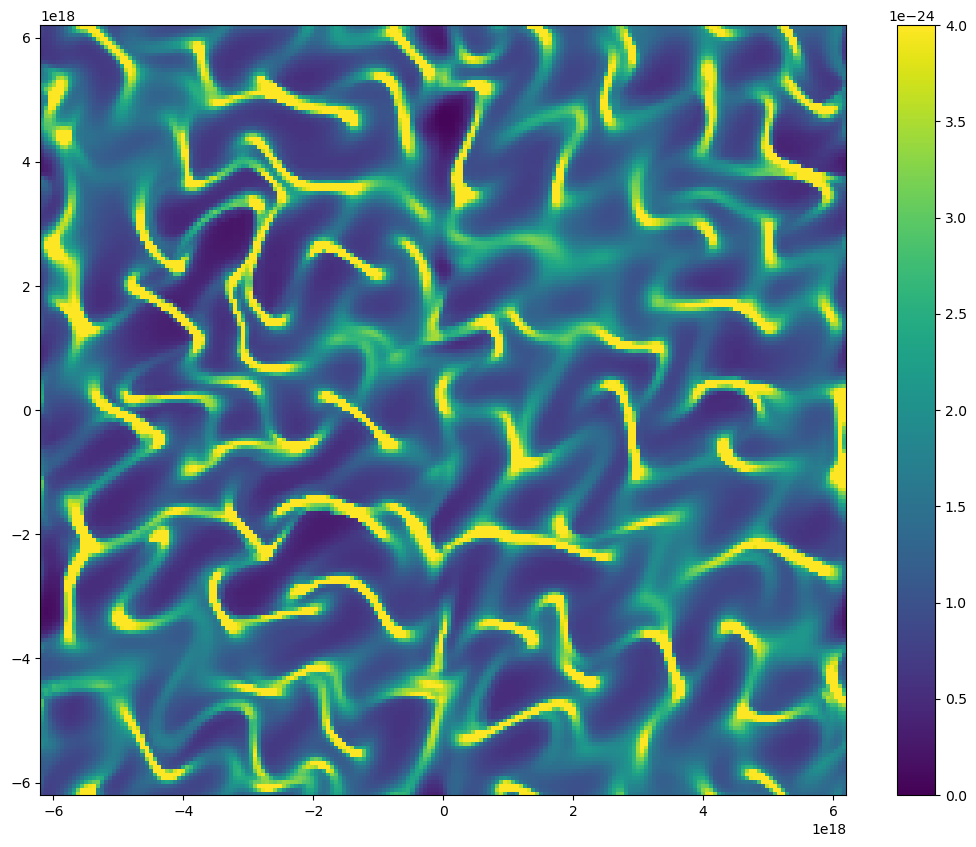

In [180]:
plt.figure(figsize = (13,10))

Z1 = plt.pcolor(X, Y, rho_cgs2D, cmap = 'viridis', shading = 'auto', vmin = 0, vmax= 4.e-24)

CB1 = plt.colorbar(Z1)

plt.show()

In [181]:
dx = float(x[1]-x[0])

print(dx)

6.203015075376845e+16


# Gradients of scalar functions:

In [182]:
gradient_rho = np.gradient(rho_cgs2D, dx)

In [183]:
print(type(gradient_rho))

<class 'list'>


In [184]:
x_gradient_rho = gradient_rho[0]
y_gradient_rho = gradient_rho[1]

total_gradient_rho = np.sqrt(x_gradient_rho**2 + y_gradient_rho**2)

In [185]:
print(x_gradient_rho)

[[ 9.93688805e-43  2.64548168e-43  1.29676080e-43 ... -1.54516586e-42
  -1.06920837e-42  1.17716251e-42]
 [ 1.35236407e-42  3.43876809e-43  1.32788501e-43 ... -1.75521776e-42
  -1.41572745e-42  7.71298881e-43]
 [ 1.61904487e-42  5.71897403e-43  2.43364967e-43 ... -1.67285286e-42
  -1.75321911e-42 -5.03410593e-44]
 ...
 [ 5.89972970e-43  3.05023592e-43  1.58540840e-43 ...  1.68424021e-43
   1.52216784e-42  1.96733609e-42]
 [ 6.86929754e-43  4.00031974e-43  1.13784193e-43 ...  2.99238996e-44
   7.36639158e-43  2.04042315e-42]
 [ 7.89977392e-43  5.00708510e-43  1.62410530e-43 ... -5.67947959e-44
   2.92163174e-43  2.06599165e-42]]


In [186]:
print(np.max(total_gradient_rho ))
print(np.min(total_gradient_rho ))

1.7556361806717732e-40
5.510846709523194e-45


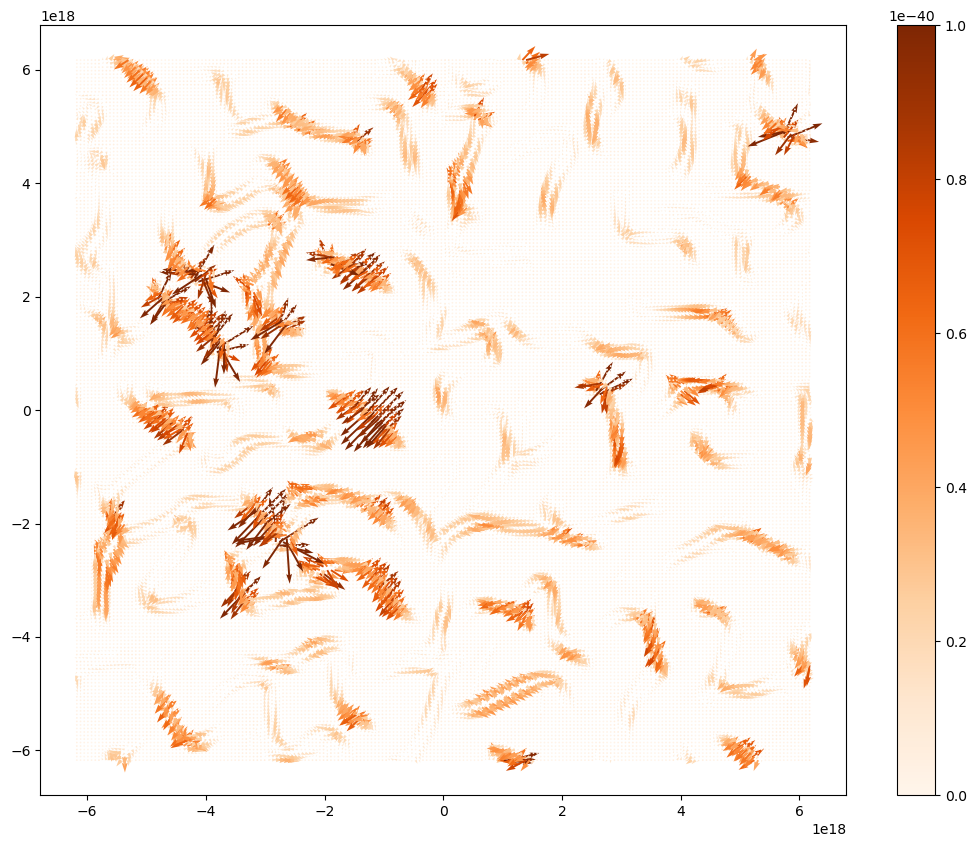

In [187]:
plt.figure(figsize = (13,10))

#Z1 = plt.pcolor(X, Y, rho_cgs2D, cmap = 'viridis', shading = 'auto', vmin = 0, vmax= 4.e-24)
Z2 = plt.quiver(X, Y, x_gradient_rho, y_gradient_rho, total_gradient_rho, cmap = 'Oranges', clim = (0, 1.e-40))

#CB1 = plt.colorbar(Z1)

CB2 = plt.colorbar(Z2)

plt.show()

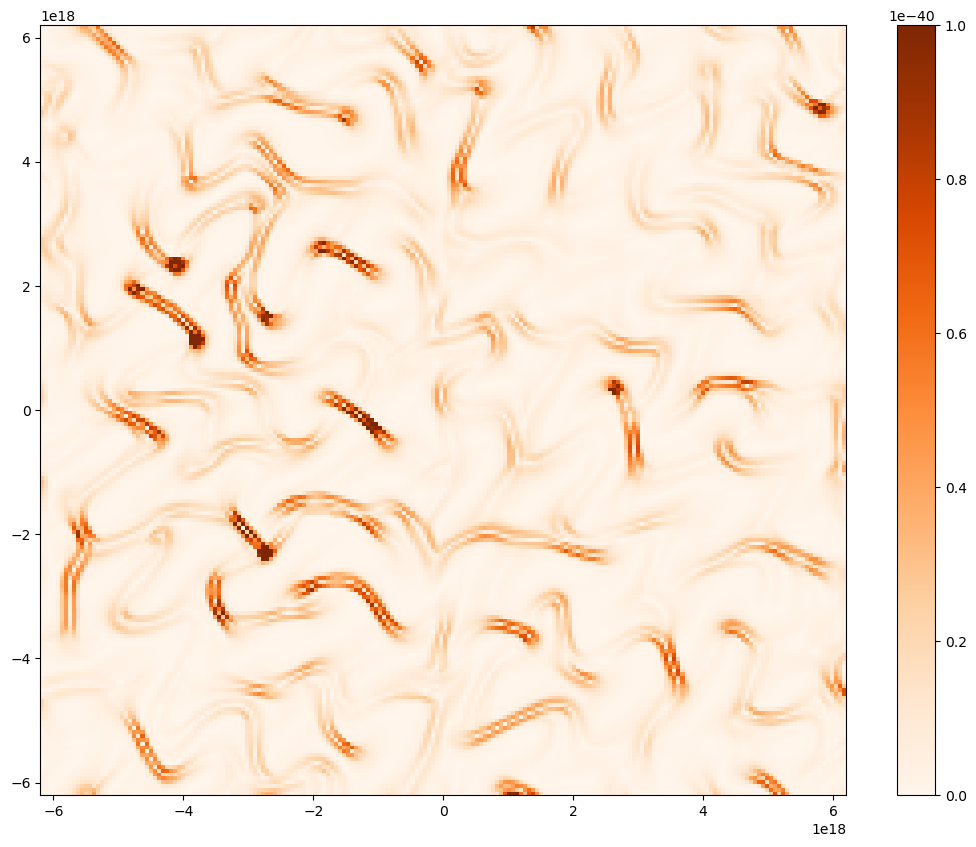

In [188]:
plt.figure(figsize = (13,10))

Z1 = plt.pcolor(X, Y, total_gradient_rho, cmap = 'Oranges', shading = 'auto', vmin = 0, vmax= 1.e-40)
#Z2 = plt.quiver(X, Y, x_gradient_rho, y_gradient_rho, total_gradient_rho, cmap = 'Oranges', clim = (0, 1.e-40))

CB1 = plt.colorbar(Z1)

#CB2 = plt.colorbar(Z2)

plt.show()